In [45]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn
import scipy
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
#import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

In [46]:
c_df = pd.read_csv(r'C:\Users\prart\OneDrive\Desktop\python\archive.zip')
#printing dataset
print(c_df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [47]:
#checking for missing values
c_df.isnull().sum()
#the data set dont have any missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
#unique()-to find the unique values from a series
c_df['Class'].unique()
#valid transaction-0
#fraud transaction-1

array([0, 1], dtype=int64)

In [49]:
#checking statistic description data
c_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [50]:
#Seprating the data into fraud and valid transactions
c_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [51]:
valid = c_df[c_df['Class'] == 0]
fraud = c_df[c_df['Class'] == 1]
print(valid.shape, fraud.shape)

(284315, 31) (492, 31)


In [52]:
# Undersampling-To fix the unbalanced dataset we will use the undersampling technique. 
# In this technique we will randomly select the same number of samples from the valid transactions 
# as there are fraudtransactions.

valid_sample = valid.sample(n=492) # 492 is the number of fraudulant transactions
valid_sample.shape

(492, 31)

In [53]:
# Concatenating the fraud and legal sample dataframes
valid_fraud_df = pd.concat([valid_sample, fraud], axis=0)
valid_fraud_df.shape

(984, 31)

In [54]:
valid_fraud_df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
167184,118532.0,-5.961457,5.313382,-6.674320,6.028975,-1.387560,0.670638,-4.128987,-4.765894,-1.005259,...,5.556642,-1.501808,1.355172,0.141093,0.077913,0.473988,0.287129,1.468653,105.89,1
147412,88520.0,2.026630,-0.062958,-3.063638,0.251527,2.939138,3.300284,0.003660,0.673637,0.045306,...,0.041300,0.225869,0.031655,0.707316,0.511265,-0.471668,0.001687,-0.068234,7.40,0
29687,35585.0,-2.019001,1.491270,0.005222,0.817253,0.973252,-0.639268,-0.974073,-3.146929,-0.003159,...,2.839596,-1.185443,-0.142812,-0.086103,-0.329113,0.523601,0.626283,0.152440,0.76,1
41569,40742.0,-2.377533,0.520539,-8.094139,8.005351,2.640750,-3.381586,-1.934372,0.562322,-3.104027,...,0.148284,0.721100,2.661291,-0.508620,-0.401657,0.587611,0.500326,0.551760,1.00,1
243393,151916.0,-5.488032,3.329561,-5.996296,3.601720,-2.023926,-1.737393,-4.396859,0.228394,-1.675884,...,1.719631,0.343209,0.133584,0.833340,-0.839776,0.502010,-1.937473,1.521218,0.01,1


In [55]:
valid_fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88701.552846,-2.397392,1.741958,-3.555101,2.250062,-1.578536,-0.696885,-2.736007,0.282031,-1.271315,...,0.354151,-0.015498,-0.011475,-0.032790,0.005381,0.027997,0.103570,0.050717,117.935803,0.500000
std,48553.026971,5.550060,3.796228,6.204564,3.240518,4.212487,1.745116,5.891466,4.861065,2.333404,...,2.794519,1.161160,1.203094,0.576044,0.679668,0.489785,1.018248,0.542128,297.019186,0.500254
min,73.000000,-30.552380,-17.826979,-31.103685,-4.345575,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.283473,-7.263482,-4.950970,0.000000,0.000000
25%,46465.250000,-2.874575,-0.233410,-5.129049,-0.110895,-1.826235,-1.551706,-3.103817,-0.217135,-2.320653,...,-0.173890,-0.552822,-0.240222,-0.373348,-0.337608,-0.298692,-0.062912,-0.057446,1.290000,0.000000
50%,83526.000000,-0.769587,0.920353,-1.397989,1.364828,-0.424993,-0.701415,-0.599297,0.150258,-0.696465,...,0.155999,-0.032784,-0.009508,0.017203,0.039455,-0.004840,0.048133,0.036304,18.545000,0.500000
75%,135110.750000,1.065655,2.833075,0.241051,4.271931,0.474966,0.039267,0.281865,0.838486,0.168125,...,0.683621,0.548830,0.217042,0.390276,0.383560,0.337125,0.468196,0.222078,99.990000,1.000000
max,172550.000000,2.299937,22.057729,3.296918,12.114672,11.095089,6.474115,9.658528,20.007208,6.645526,...,27.202839,8.361985,5.466230,3.208814,2.208209,2.745261,5.986798,9.823638,4190.000000,1.000000


In [56]:
valid_fraud_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [57]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(valid_fraud_df.drop(columns='Class'))
scaled_valid_fraud_df = pd.DataFrame(scaled_data, columns=valid_fraud_df.columns[:-1])
scaled_valid_fraud_df.sample(5)
#The dataset is balanced and we can proceed with the model building.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
448,-0.353454,0.636052,-0.704840,0.591290,-0.896358,0.134942,0.126375,0.397185,-0.081035,0.083104,...,-0.329615,-0.195249,-0.298080,-0.121720,0.162871,0.375286,2.200827,-0.184668,-0.065373,0.057481
330,-1.061082,0.062364,-0.524136,0.966364,-1.052120,-0.101129,0.221828,0.358215,0.049570,0.476462,...,0.001645,-0.050557,0.778551,-0.285728,1.816524,0.768612,-0.429509,0.167098,0.111848,0.016116
357,-0.165544,0.249719,-0.111339,0.743391,-0.700948,0.239326,-0.174656,0.508601,0.034698,0.480895,...,-0.158540,-0.211539,-0.627498,0.094212,0.613983,-0.241003,0.116218,0.139162,0.107738,-0.361998
573,-1.219402,0.630980,0.286538,-0.060917,0.758792,1.072715,-0.632955,0.748707,-0.119844,-0.648180,...,-0.196356,-0.165102,-0.202101,-0.424248,-0.722812,1.893455,0.997535,-0.092779,0.189352,-0.394976
455,1.596622,0.268286,-0.163862,0.423265,-0.999805,1.026287,1.356961,0.681820,0.002145,0.106178,...,-0.248222,-0.090833,0.295125,-0.573464,-2.955376,1.484320,2.042416,-0.389473,-0.008949,-0.313829


In [58]:
#Train and Test Split
# Splitting the data into features and target
X = scaled_valid_fraud_df
y = valid_fraud_df['Class']
# importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2, test_size=0.2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [59]:
#Model Building
# importing Logistic Regression
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
my_model.fit(X_train, y_train)
train_preds = my_model.predict(X_train)
test_preds = my_model.predict(X_test)
#Evaluating the model
from sklearn.metrics import accuracy_score


In [60]:
# Accuracy score for test data
print("Training Data Accuracy: ",accuracy_score(train_preds, y_train))

Training Data Accuracy:  0.951715374841169


In [61]:
# Accuracy score for test data
print("Training Data Accuracy: ",accuracy_score(train_preds, y_train))

Training Data Accuracy:  0.951715374841169


In [62]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(c_df, nGraphShown, nGraphPerRow):
    nunique = c_df.nunique()
    c_df = c_df[[col for col in c_df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = c_df.shape
    columnNames = list(c_df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = c_df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [63]:
# Correlation matrix
def plotCorrelationMatrix(c_df, graphWidth):
    filename = c_df.dataframeName
    c_df = c_df.dropna('columns') # drop columns with NaN
    c_df= c_df[[col for col in c_df if c_df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if c_df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = c_df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [64]:
# Scatter and density plots
def plotScatterMatrix(c_df, plotSize, textSize):
    c_df = c_df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    c_df = c_df.dropna('columns')
    c_df = c_df[[col for col in c_df if c_df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(c_df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    c_df = c_df[columnNames]
    ax = pd.plotting.scatter_matrix(c_df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = c_df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [65]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# creditcard.csv has 284807 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('C:\\Users\\prart\\OneDrive\\Desktop\\python\\archive.zip', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'creditcard.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 31 columns


In [66]:
df1.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


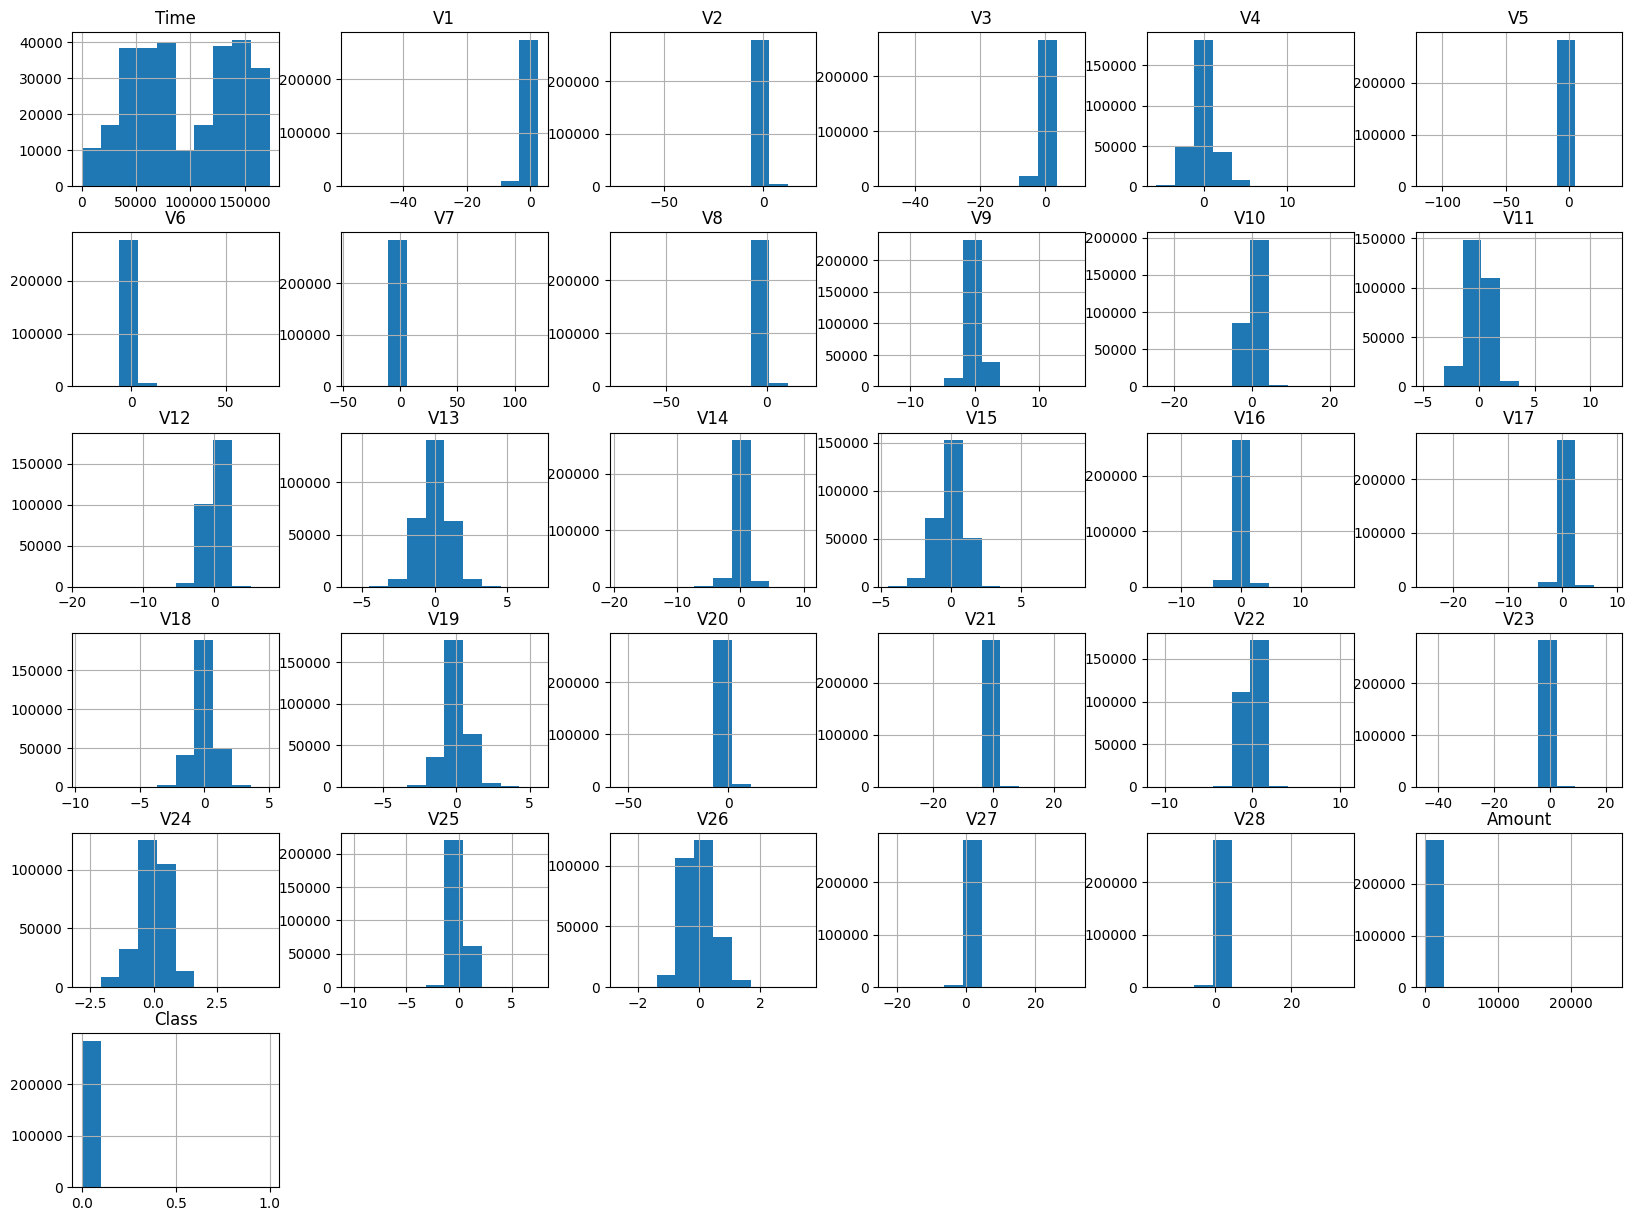

In [67]:
c_df.hist(figsize = (20,15))
plt.show()

C:\Users\prart\AppData\Local\Temp\ipykernel_21096\2732410663.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




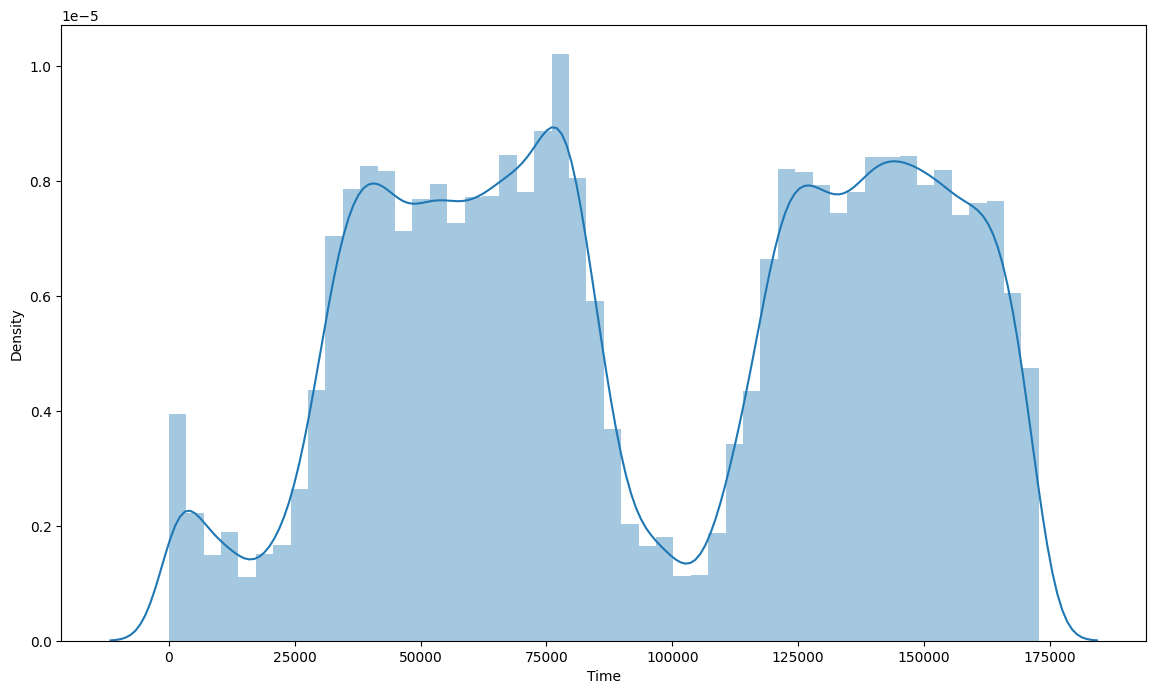

In [68]:
import seaborn as sns
sns.distplot(c_df['Time'])
plt.show()

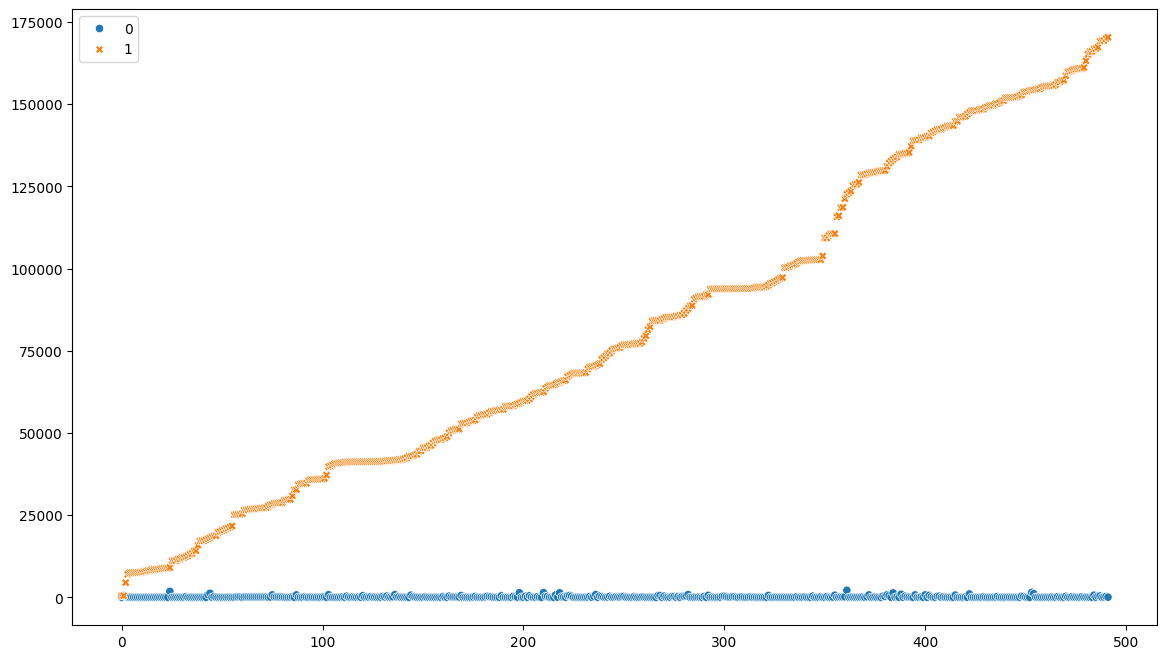

In [69]:
sns.scatterplot(c_df[c_df['Class']==1][['Amount','Time']].values)
plt.show()

In [70]:
corr_mat = c_df.corr()
corr_mat

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [71]:
corr_mat['Amount'].sort_values(ascending = False)

Amount    1.000000
V7        0.397311
V20       0.339403
V6        0.215981
V21       0.105999
V4        0.098732
V18       0.035650
V14       0.033751
V27       0.028825
V28       0.010258
V17       0.007309
Class     0.005632
V13       0.005293
V24       0.005146
V11       0.000104
V15      -0.002986
V26      -0.003208
V16      -0.003910
V12      -0.009542
Time     -0.010596
V9       -0.044246
V25      -0.047837
V19      -0.056151
V22      -0.064801
V10      -0.101502
V8       -0.103079
V23      -0.112633
V3       -0.210880
V1       -0.227709
V5       -0.386356
V2       -0.531409
Name: Amount, dtype: float64

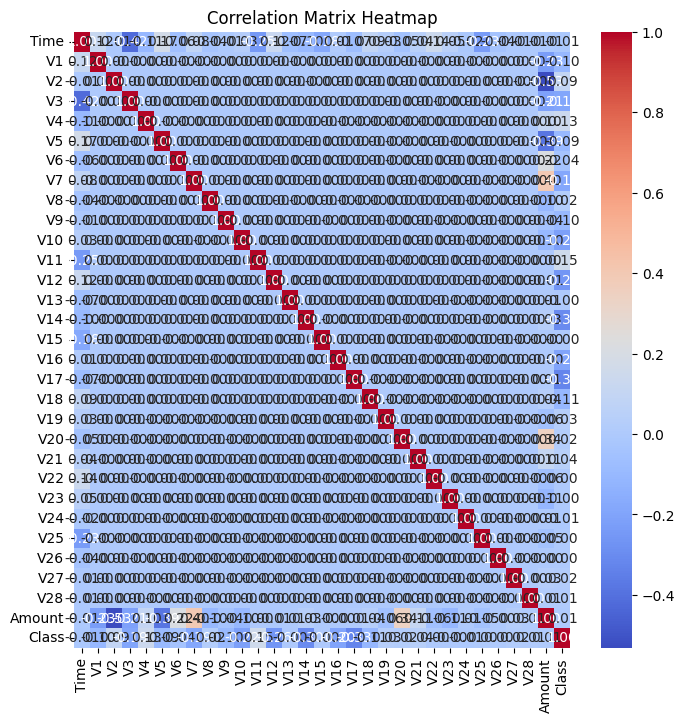

In [72]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [73]:
c_df= c_df.sample(frac = 0.1,random_state=1)
c_df.shape

(28481, 31)

C:\Users\prart\AppData\Local\Temp\ipykernel_21096\1892408398.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



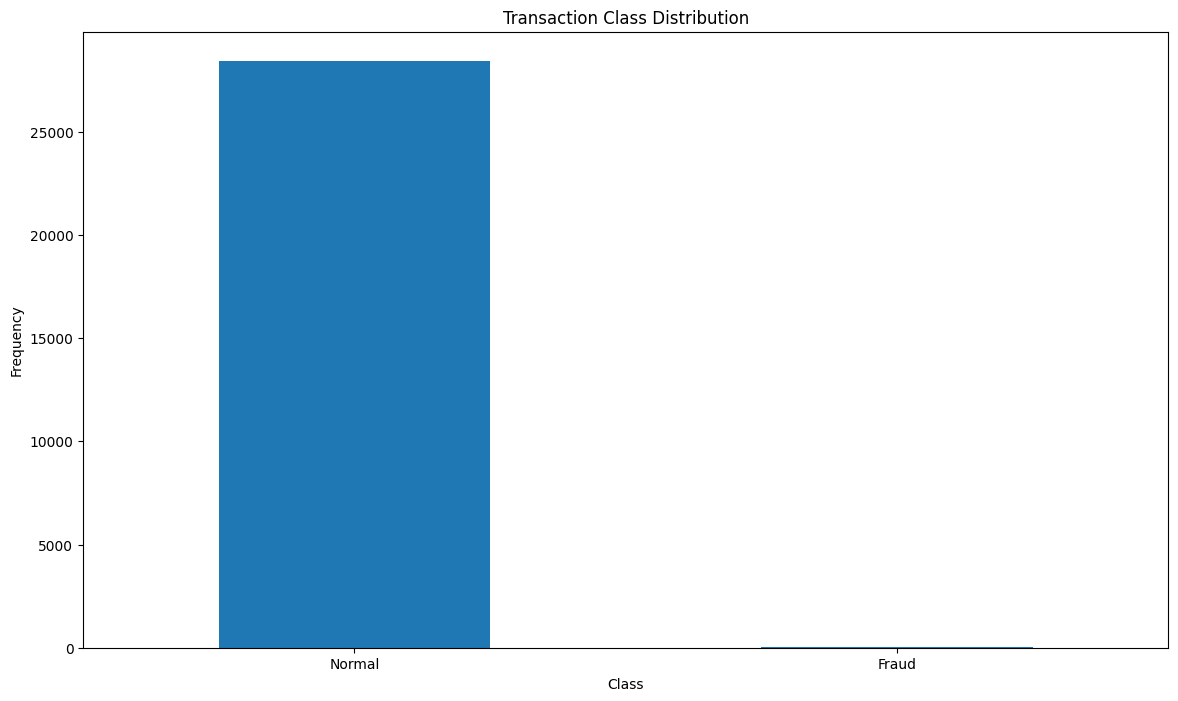

In [74]:
count_classes = pd.value_counts(c_df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [75]:
Normal = c_df[c_df['Class']==0]
Fraud = c_df[c_df['Class']==1]
Normal.shape

(28432, 31)

In [76]:
Fraud.shape

(49, 31)

In [77]:
Normal.Amount.describe()

count    28432.000000
mean        89.813898
std        270.636594
min          0.000000
25%          5.990000
50%         22.380000
75%         78.820000
max      19656.530000
Name: Amount, dtype: float64

In [78]:
Fraud.Amount.describe()

count      49.000000
mean      173.505306
std       387.996569
min         0.000000
25%         1.000000
50%         4.900000
75%       122.680000
max      2125.870000
Name: Amount, dtype: float64

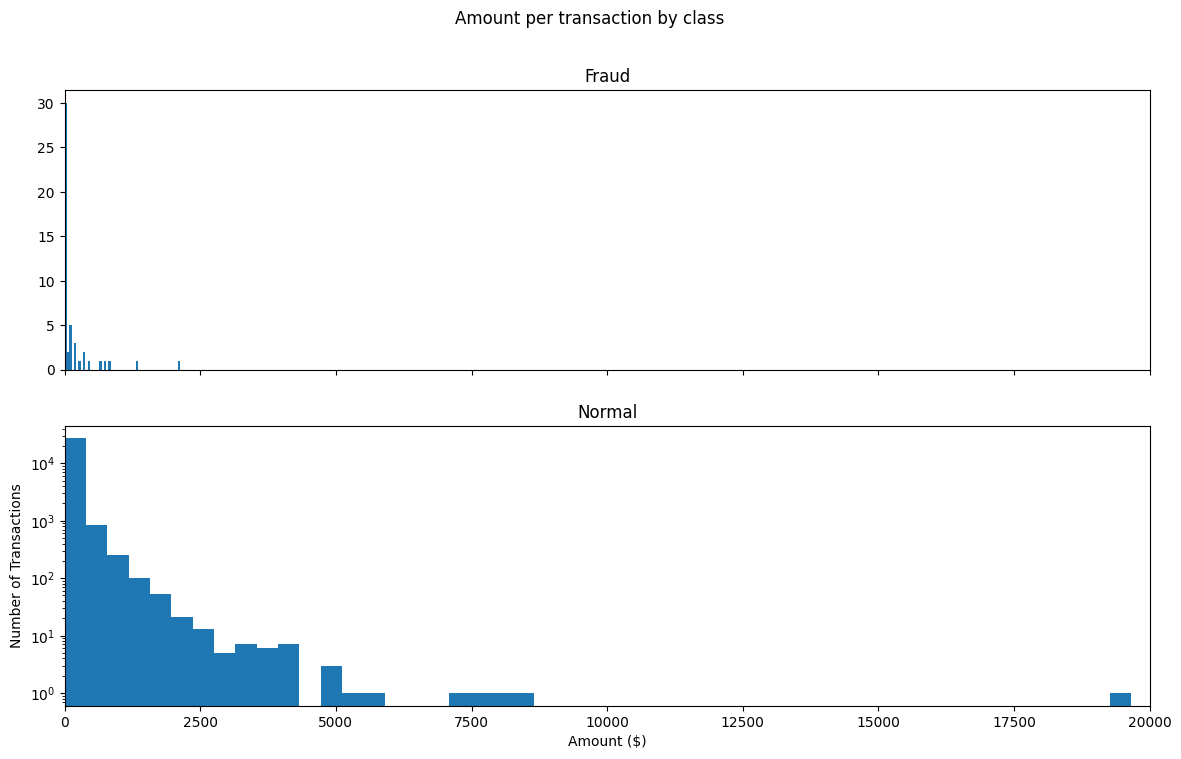

In [79]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


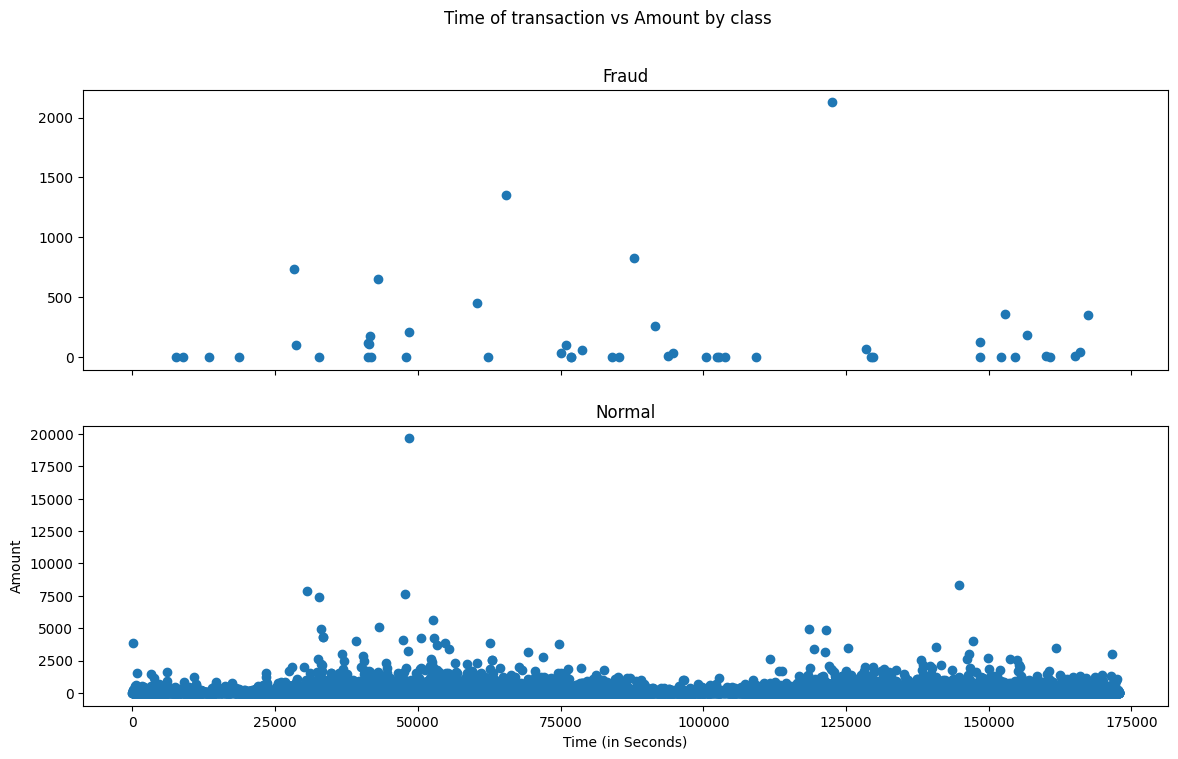

In [80]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();

In [81]:
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

In [82]:
trace = go.Scatter(
    x = Fraud.Time,
    y = Fraud.Amount,
    mode = 'markers'
)
data = [trace]

plotly.offline.iplot({
    "data": data
})

In [83]:
Fraud = c_df[c_df['Class']==1]
Valid = c_df[c_df['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


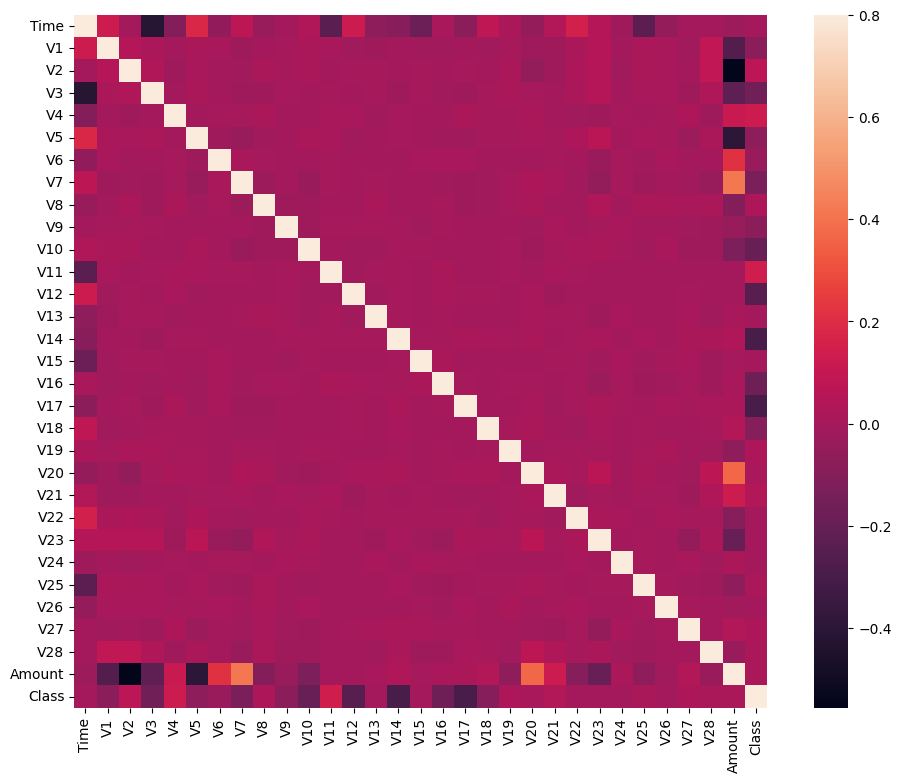

In [84]:
correlation_matrix = c_df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()


In [85]:
columns = c_df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = c_df[columns]
Y = c_df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [86]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [87]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8516
Accuracy Score :
0.7009936448860644
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.70   